In [40]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

# Basic Global Thresholding

In [41]:
def global_thresholding(image, max_iteration, stop_condition):
    T = np.mean(image)

    for i in range(max_iteration):
        G1 = image[image>T]
        G2 = image[image<=T]

        mu1 = np.mean(G1)
        mu2 = np.mean(G2)

        new_T = (mu1+mu2)/2

        if abs(new_T - T) < stop_condition:
            break

        T = new_T
    
    segmented = np.uint8(image > T) * 255
    return segmented, T

# Adaptive Thresholding

In [42]:
def adaptive_thresholding(image, block_size):
    h, w = image.shape
    result = np.zeros_like(image, dtype=np.uint8)

    for i in range(0, h, block_size):
        for j in range(0, w, block_size):
            # Extract sub-image
            sub_img = image[i:i+block_size, j:j+block_size]
            # Apply basic thresholding
            thresholded_block, _ = global_thresholding(sub_img, 100, 0.5)
            result[i:i+block_size, j:j+block_size] = thresholded_block

    return result


# Load Image

Threshold value = 48.38290533788459


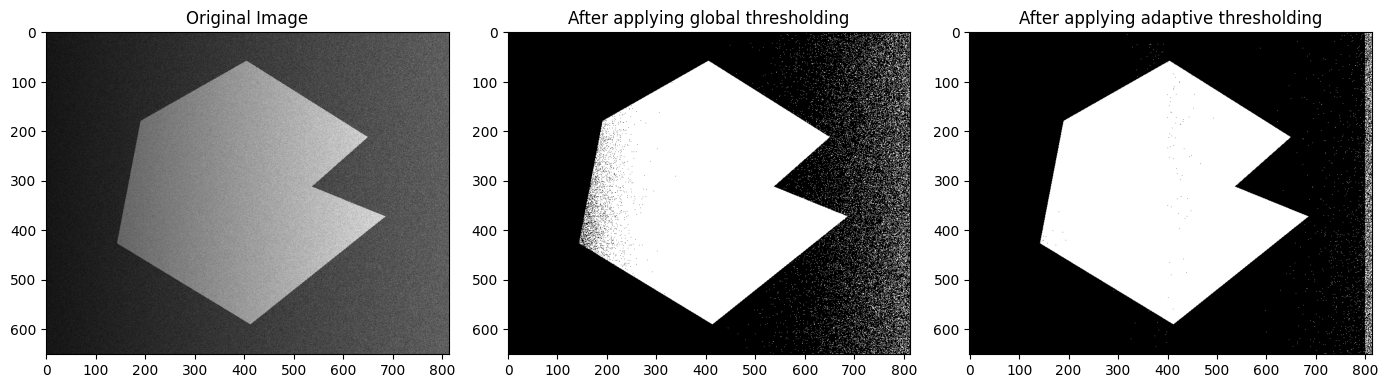

In [43]:
image = cv2.imread('noisy_septagon.tif', cv2.IMREAD_GRAYSCALE)

global_segmented_image, threshold  = global_thresholding(image, 100, 0.5)
adaptive_segmented_image = adaptive_thresholding(image, 400)

print(f"Threshold value = {threshold}")

plt.figure(figsize=(14,7))
plt.subplot(1,3,1)
plt.imshow(image, cmap='gray')
plt.title('Original Image')

plt.subplot(1,3,2)
plt.imshow(global_segmented_image, cmap='gray')
plt.title('After applying global thresholding')

plt.subplot(1,3,3)
plt.imshow(adaptive_segmented_image, cmap='gray')
plt.title('After applying adaptive thresholding')

plt.tight_layout()
plt.show()